In [1]:
# http://pandas.pydata.org/pandas-docs/version/0.18/indexing.html#indexing-label

import pandas as pd

In [2]:
# DataFrame 선언 
df = pd.DataFrame(data= {'end_price':[13.0, 13.2, 12.8, 13.0, 14.0, 13.8]})

In [3]:
df

,end_price
0,13.0
1,13.2
2,12.8
3,13.0
4,14.0
5,13.8


In [4]:
# index 선언 
df.index = pd.Index(data=["10/13","10/15","10/16","10/17","10/20","10/21"])

In [5]:
# index에는 range index 도 있다
pd.RangeIndex(start = 1, stop = 7, step = 1)

RangeIndex(start=1, stop=7, step=1)

In [6]:
# 출력 확인. 그냥 df만 치는 것과 같다. 
# print(df)와의 비교

display(df)

,end_price
10/13,13.0
10/15,13.2
10/16,12.8
10/17,13.0
10/20,14.0
10/21,13.8


In [7]:
# df를 출력하면 df.to_html()의 내용이 출력된다
df.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>end_price</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>10/13</th>\n      <td>13.0</td>\n    </tr>\n    <tr>\n      <th>10/15</th>\n      <td>13.2</td>\n    </tr>\n    <tr>\n      <th>10/16</th>\n      <td>12.8</td>\n    </tr>\n    <tr>\n      <th>10/17</th>\n      <td>13.0</td>\n    </tr>\n    <tr>\n      <th>10/20</th>\n      <td>14.0</td>\n    </tr>\n    <tr>\n      <th>10/21</th>\n      <td>13.8</td>\n    </tr>\n  </tbody>\n</table>'

In [8]:
df

,end_price
10/13,13.0
10/15,13.2
10/16,12.8
10/17,13.0
10/20,14.0
10/21,13.8


In [9]:
df['end_price']

10/13    13.0
10/15    13.2
10/16    12.8
10/17    13.0
10/20    14.0
10/21    13.8
Name: end_price, dtype: float64

In [10]:
# loc = label-based
df.loc['10/13', 'end_price']

13.0

In [11]:
# 컬럼 추가: 동일 인덱스를 사용하기에 배열 할당
df['start_price'] = [12.0,12.2,11.8,12.0,13.0, 12.8]

# 컬럼 추가: Series 사용 (index 가 있어야 함 )
afp = pd.Series(data = [13.0,13.2,12.8,13.0,14.0,13.8])
df['after_market_price'] = afp

`# afp 에 별도의 index가 있는 경우, 해당 index와 일치한 값만 df에 할당된다
afp.index = ["10/11", "10/12", "10/13", "10/14", "10/15", "!0/16"]`

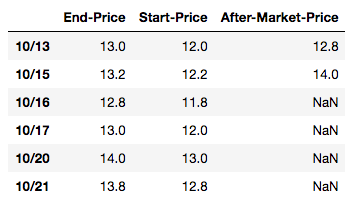

In [12]:
afp

0    13.0
1    13.2
2    12.8
3    13.0
4    14.0
5    13.8
dtype: float64

In [13]:
df

,end_price,start_price,after_market_price
10/13,13.0,12.0,NaN
10/15,13.2,12.2,NaN
10/16,12.8,11.8,NaN
10/17,13.0,12.0,NaN
10/20,14.0,13.0,NaN
10/21,13.8,12.8,NaN


In [14]:
# afp Series의 index가 df 다르기에 df 의 NaN 개수는 [6,6,0]이다
df.count()

end_price             6
start_price           6
after_market_price    0
dtype: int64

In [15]:
# DataFrame Selection: 컬럼 단독
df['end_price']

10/13    13.0
10/15    13.2
10/16    12.8
10/17    13.0
10/20    14.0
10/21    13.8
Name: end_price, dtype: float64

In [16]:
#DataFrame Selection: 복수 컬럼 > 배열 사용
df[['start_price', 'end_price']]

,start_price,end_price
10/13,12.0,13.0
10/15,12.2,13.2
10/16,11.8,12.8
10/17,12.0,13.0
10/20,13.0,14.0
10/21,12.8,13.8


In [17]:
# loc 호출은 __getitem__으로 구현됨: []
# Selection 에는 가급적 :를 잘지원하는 loc 사용(?)
df.loc[:,"end_price":"after_market_price"]

,end_price,start_price,after_market_price
10/13,13.0,12.0,NaN
10/15,13.2,12.2,NaN
10/16,12.8,11.8,NaN
10/17,13.0,12.0,NaN
10/20,14.0,13.0,NaN
10/21,13.8,12.8,NaN


In [18]:
df["end_price":"after_market_price"]

,end_price,start_price,after_market_price


In [19]:
df[["end_price","start_price","after_market_price"]]

,end_price,start_price,after_market_price
10/13,13.0,12.0,NaN
10/15,13.2,12.2,NaN
10/16,12.8,11.8,NaN
10/17,13.0,12.0,NaN
10/20,14.0,13.0,NaN
10/21,13.8,12.8,NaN


In [20]:
# values 로 배열 추출
df["after_market_price"] = afp.values

In [21]:
df

,end_price,start_price,after_market_price
10/13,13.0,12.0,13.0
10/15,13.2,12.2,13.2
10/16,12.8,11.8,12.8
10/17,13.0,12.0,13.0
10/20,14.0,13.0,14.0
10/21,13.8,12.8,13.8


In [22]:
# selection 
df["end_price"]["10/13"] == df.loc["10/13", "end_price" ]

True

In [23]:
#DataFrame에서 sum 등 각종 summary 계산은 column 별로
df.sum()

end_price             79.8
start_price           73.8
after_market_price    79.8
dtype: float64

In [24]:
# 누적해서 더하기, 각 누적 단계 표시
df.cumsum()

,end_price,start_price,after_market_price
10/13,13.0,12.0,13.0
10/15,26.2,24.2,26.2
10/16,39.0,36.0,39.0
10/17,52.0,48.0,52.0
10/20,66.0,61.0,66.0
10/21,79.8,73.8,79.8


In [25]:
df.mean()

end_price             13.3
start_price           12.3
after_market_price    13.3
dtype: float64

In [26]:
df['signal'] = [0,1,2,0,-1,-2]

In [27]:
df

,end_price,start_price,after_market_price,signal
10/13,13.0,12.0,13.0,0
10/15,13.2,12.2,13.2,1
10/16,12.8,11.8,12.8,2
10/17,13.0,12.0,13.0,0
10/20,14.0,13.0,14.0,-1
10/21,13.8,12.8,13.8,-2


In [28]:
# attribute 에 기반한 access ( > 0.18 )
df.signal

10/13    0
10/15    1
10/16    2
10/17    0
10/20   -1
10/21   -2
Name: signal, dtype: int64

In [29]:
df["err"] = df["end_price"] - df["start_price"]

In [30]:
df

,end_price,start_price,after_market_price,signal,err
10/13,13.0,12.0,13.0,0,1.0
10/15,13.2,12.2,13.2,1,1.0
10/16,12.8,11.8,12.8,2,1.0
10/17,13.0,12.0,13.0,0,1.0
10/20,14.0,13.0,14.0,-1,1.0
10/21,13.8,12.8,13.8,-2,1.0
